In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

In [2]:
sns.set_style('darkgrid')
plt.rcParams['figure.dpi'] = 80
warnings.filterwarnings('ignore')

In [5]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

In [6]:
species_maping = dict(zip(range(3), iris.target_names))
species_maping

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [7]:
y_names = np.vectorize(species_maping.get)(y)

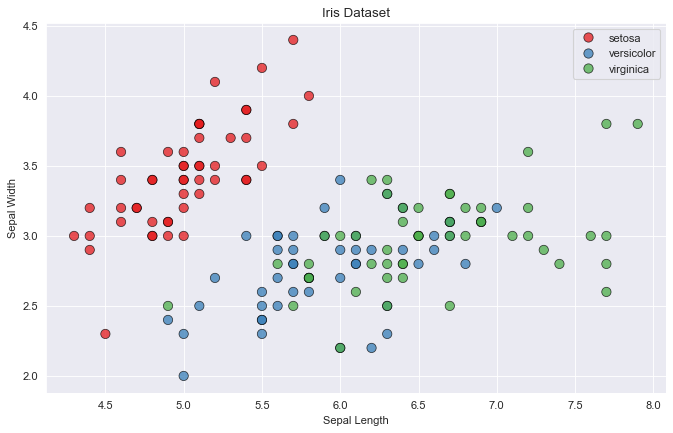

In [8]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    x=X[:, 0],
    y=X[:, 1],
    hue=y_names,
    s=70,
    palette='Set1',
    edgecolor='black',
    alpha=0.75
)

plt.title('Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.shape, X_test.shape

((112, 2), (38, 2))

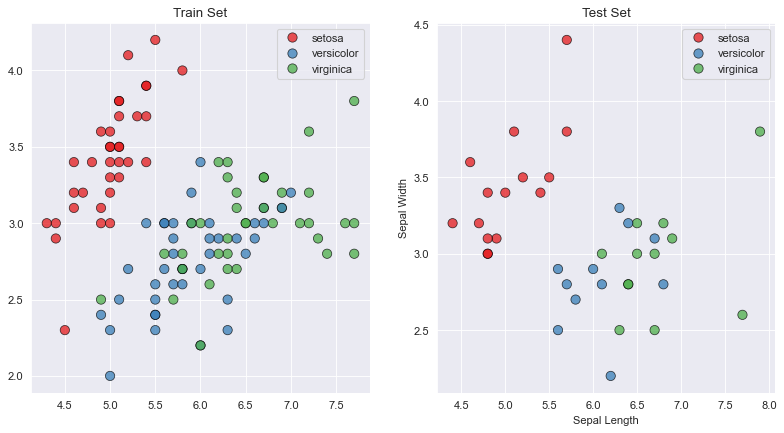

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.scatterplot(
    x=X_train[:, 0],
    y=X_train[:, 1],
    hue=np.vectorize(species_maping.get)(y_train),
    hue_order=['setosa', 'versicolor', 'virginica'],
    s=70,
    palette='Set1',
    edgecolor='black',
    alpha=0.75,
    ax=ax[0]
)

sns.scatterplot(
    x=X_test[:, 0],
    y=X_test[:, 1],
    hue=np.vectorize(species_maping.get)(y_test),
    hue_order=['setosa', 'versicolor', 'virginica'],
    s=70,
    palette='Set1',
    edgecolor='black',
    alpha=0.75,
    ax=ax[1]
)

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()


In [11]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
knn.score(X_test, y_test)

0.8157894736842105

In [14]:
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 2, 0, 1,
       0, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0])

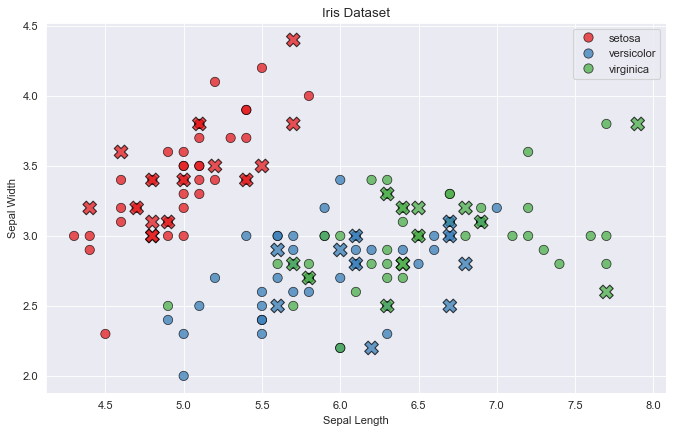

In [42]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    x=X_train[:, 0],
    y=X_train[:, 1],
    hue=np.vectorize(species_maping.get)(y_train),
    hue_order=['setosa', 'versicolor', 'virginica'],
    s=70,
    palette='Set1',
    edgecolor='black',
    alpha=0.75
)

sns.scatterplot(
    x=X_test[:, 0],
    y=X_test[:, 1],
    hue=np.vectorize(species_maping.get)(y_pred),
    hue_order=['setosa', 'versicolor', 'virginica'],
    s=150,
    palette='Set1',
    edgecolor='black',
    alpha=0.75,
    marker='X',
    legend=False
)

plt.title('Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()  # Add legend
plt.show()


In [44]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[15,  0,  0],
       [ 0,  7,  4],
       [ 0,  3,  9]], dtype=int64)

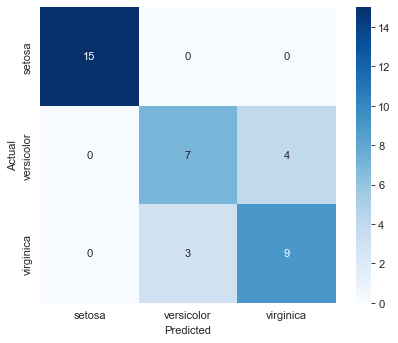

In [46]:
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap='Blues',
    xticklabels=iris.target_names,
    yticklabels=iris.target_names,
    square=True
)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()